In [1]:
# Import library
from bs4 import BeautifulSoup
import requests

In [2]:
#URL
html_text = requests.get('https://www.timesjobs.com/candidate/job-search.html?searchType=personalizedSearch&from=submit&txtKeywords=Data+Analyst&txtLocation=&cboWorkExp1=-1').text

In [3]:
soup = BeautifulSoup(html_text, 'lxml')

job = soup.find('li', class_ = 'clearfix job-bx wht-shd-bx')

In [4]:
job_name = job.find('h2').text.strip()
company_name = job.find('h3',class_='joblist-comp-name').text.strip()
skills = job.find('span', class_ = 'srp-skills').text.strip().replace('  ,  ',', ')
description = job.find(class_ = 'list-job-dtl clearfix').text.split('KeySkills')[0].strip()
experience = job.find('ul', class_ = 'top-jd-dtl clearfix').text.split('location_on')[0].split('card_travel')[1].strip()
location = job.find('ul', class_ = 'top-jd-dtl clearfix').text.split('location_on')[1].replace('\n','').strip()

print(job_name)
print(company_name)
print(skills)
print(description)
print(experience)
print(location)

Data Analyst
cross-tab marketing services pvt.
macros, vba, data analyst
Job Description:
Data AnalystThe Data Processing Programmer's primary role is to take over the full responsibility of survey validation and tabulation related to the Online Market Research pro... More Details
1 - 3 yrs
Mumbai


In [5]:
#run with loop
jobs = soup.find_all('li', class_ = 'clearfix job-bx wht-shd-bx')


for job in jobs:
    job_name = job.find('h2').text.strip()
    company_name = job.find('h3',class_='joblist-comp-name').text.strip()
    skills = job.find('span', class_ = 'srp-skills').text.strip().replace('  ,  ',', ')
    description = job.find(class_ = 'list-job-dtl clearfix').text.split('KeySkills')[0].replace('\n','').strip()
    experience = job.find('ul', class_ = 'top-jd-dtl clearfix').text.split('location_on')[0].split('card_travel')[1].strip()
    location = job.find('ul', class_ = 'top-jd-dtl clearfix').text.split('location_on')[1].replace('\n','').strip()

    print(f'''
    Job Name:{job_name}
    Company Name: {company_name}
    Skills: {skills}
    Description: {description}
    Experience: {experience}
    Location: {location}
    ''')



    Job Name:Data Analyst
    Company Name: cross-tab marketing services pvt.
    Skills: macros, vba, data analyst
Data AnalystThe Data Processing Programmer's primary role is to take over the full responsibility of survey validation and tabulation related to the Online Market Research pro... More Details
    Experience: 1 - 3 yrs
    Location: Mumbai
    

    Job Name:Data Analyst
    Company Name: SEVEN CONSULTANCY
    Skills: Big data analyst,  Data analyst,  analytical tools,  collecting data
JOB DETAILS1.Importing / Collecting ,  cleaning ,  converting and analyzing the data for the purpose of find insights and making conclusions.2.Presenting data in graphs ,  cha... More Details
    Experience: 1 - 2 yrs
    Location: Mumbai,  Chennai
    

    Job Name:Data Analyst
    Company Name: Saisun Outsourcing Service Pvt. Ltd.
    Skills: data analysis, spss, data analyst
Roles and ResponsibilitiesWe are looking for a dynamic Sr. Data Analyst to assist with data analysis requirements

In [6]:
#Create dataframe

jobs = soup.find_all('li', class_ = 'clearfix job-bx wht-shd-bx')

job_name = []
company_name = []
skills = []
description = []
experience = []
location = []
for job in jobs:
    job_name.append(job.find('h2').text.strip().replace('\n',''))
    company_name.append(job.find('h3',class_='joblist-comp-name').text.strip())
    skills.append(job.find('span', class_ = 'srp-skills').text.strip().replace('  ,  ',', '))
    description.append(job.find(class_ = 'list-job-dtl clearfix').text.split('KeySkills')[0].replace('\n','').strip())
    experience.append(job.find('ul', class_ = 'top-jd-dtl clearfix').text.split('location_on')[0].split('card_travel')[1].strip())
    location.append(job.find('ul', class_ = 'top-jd-dtl clearfix').text.split('location_on')[1].replace('\n','').strip())


In [7]:
import pandas as pd
header = ['Job Name', 'Company Name', 'Skills', 'Experience', 'Location', 'Description']

df = pd.DataFrame(list(zip(job_name, company_name, skills, experience, location, description)), columns =header)

In [8]:
df

,Job Name,Company Name,Skills,Experience,Location,Description
0,Data Analyst,cross-tab marketing services pvt.,"macros, vba, data analyst",1 - 3 yrs,Mumbai,Job Description:\rData AnalystThe Data Process...
1,Data Analyst,SEVEN CONSULTANCY,"Big data analyst, Data analyst, analytical t...",1 - 2 yrs,"Mumbai, Chennai",Job Description:\rJOB DETAILS1.Importing / Col...
2,Data Analyst,Saisun Outsourcing Service Pvt. Ltd.,"data analysis, spss, data analyst",3 - 8 yrs,Ahmedabad,Job Description:\rRoles and ResponsibilitiesWe...
3,Data Analyst,GfK,"ait, data analytics, data analyst",0 - 2 yrs,,"Job Description:\rFor over 80 years , GfK has..."
4,Data Analyst,infoanalytica consulting pvt ltd,"business rules, sql, Data Analyst",5 - 8 yrs,Ahmedabad,Job Description:\rData Analyst ( Ahmedabad ) ...
5,Data Analyst,Visa Inc.,"production, warranty, innovation, Data Analyst",0 - 3 yrs,,Job Description:\rJob Description and Responsi...
6,Data Analyst,ikomet Technology Solutions Pvt. Ltd.,"macros, visualization, bi, data analyst, vba",0 - 3 yrs,Chennai,Job Description:\rData AnalystWork Location: C...
7,Data Analyst,relx india pvt. ltd. ( lexisnexis risk soluti...,"data analytics, presales, data analyst, tableau",0 - 3 yrs,,Job Description:\rAs part of a new Cirium Prof...
8,Data Analyst,TEAMPLUS STAFFING SOLUTION PVT. LTD.,"dwh, business intelligence, Data Analyst",3 - 6 yrs,Pune,Job Description:\rNote : Its a 5 months Exte...
9,Data Analyst,Faircent.com,"data analytics, vba, data analyst, sql",3 - 6 yrs,Gurgaon,Job Description:\rJob Responsibilities:Candida...


In [9]:
#Data Processing

ex = df['Experience'].str.replace(' yrs', '')
df['Description'] = df['Description'].str.replace('Job Description:\r', '')
df['Company Name'] = df['Company Name'].str.capitalize()
df

,Job Name,Company Name,Skills,Experience,Location,Description
0,Data Analyst,Cross-tab marketing services pvt.,"macros, vba, data analyst",1 - 3 yrs,Mumbai,Data AnalystThe Data Processing Programmer's p...
1,Data Analyst,Seven consultancy,"Big data analyst, Data analyst, analytical t...",1 - 2 yrs,"Mumbai, Chennai","JOB DETAILS1.Importing / Collecting , cleanin..."
2,Data Analyst,Saisun outsourcing service pvt. ltd.,"data analysis, spss, data analyst",3 - 8 yrs,Ahmedabad,Roles and ResponsibilitiesWe are looking for a...
3,Data Analyst,Gfk,"ait, data analytics, data analyst",0 - 2 yrs,,"For over 80 years , GfK has been a reliable a..."
4,Data Analyst,Infoanalytica consulting pvt ltd,"business rules, sql, Data Analyst",5 - 8 yrs,Ahmedabad,Data Analyst ( Ahmedabad ) The Data Analyst /...
5,Data Analyst,Visa inc.,"production, warranty, innovation, Data Analyst",0 - 3 yrs,,Job Description and ResponsibilitiesWhats it a...
6,Data Analyst,Ikomet technology solutions pvt. ltd.,"macros, visualization, bi, data analyst, vba",0 - 3 yrs,Chennai,Data AnalystWork Location: ChennaiRequired Exp...
7,Data Analyst,Relx india pvt. ltd. ( lexisnexis risk soluti...,"data analytics, presales, data analyst, tableau",0 - 3 yrs,,As part of a new Cirium Professional Data Serv...
8,Data Analyst,Teamplus staffing solution pvt. ltd.,"dwh, business intelligence, Data Analyst",3 - 6 yrs,Pune,Note : Its a 5 months Extendable Contract on...
9,Data Analyst,Faircent.com,"data analytics, vba, data analyst, sql",3 - 6 yrs,Gurgaon,Job Responsibilities:Candidate must have the f...


In [10]:
#Visualization
import matplotlib.pyplot as plt
import seaborn as sns

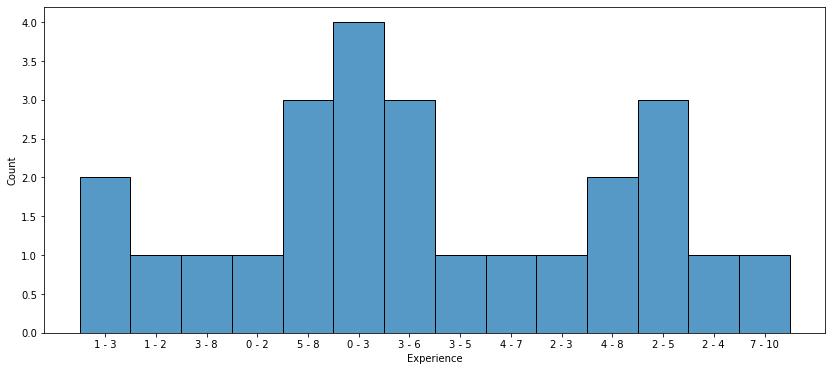

In [11]:
plt.figure(figsize=(14,6))
sns.histplot(ex)

In [12]:
# Export excel file

df.to_excel('Job_Data.xlsx')